# PRJNA1027333 Conway et al.

Article link: [Conway](https://www.nature.com/articles/s41598-025-03771-5).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA1027333"
lineages_in_paper <- c("B.1.1.7", "AY.25", "AY.4", "BG.5",
    "XBB.1.5", "XBB.1.5.23", "XBB.1.28", "XBB.1.5.1",
    "XBB.1.5.17", "XBB.1.5.49"
)


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,22204,+22205.GAGCCAGAA,ins:22205:9,0.016666667,360,6,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
2,22610,+22611.T,ins:22611:1,0.000000000,10783,0,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
3,26158,+26159.TTATGATGGGTT,ins:26159:12,0.625669968,28173,17627,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
4,6139,+6140.T,ins:6140:1,0.002165674,1847,4,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
5,11282,-11283.9,del:11283:9,0.005327930,13326,71,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
6,11287,-11288.9,del:11288:9,0.952233010,12875,12260,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan


In [3]:
barcodes <- provoc::usher_barcodes()
print("Lineages not in barcodes:")
print(setdiff(lineages_in_paper, rownames(barcodes)))
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1] "Lineages not in barcodes:"
character(0)


[1]  10 148

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


Warning message in remove_identical_lineages(data, annihilate):
“Lineages lin_XBB.1.5.17, lin_XBB.1.5.49 are duplicates of eachother”
Warning message in remove_identical_lineages(data, annihilate):
“Lineages lin_XBB.1.5 are duplicates of eachother”


   user  system elapsed 
  2.956   0.032   3.016 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,2.693954e-04,NA,NA,XBB.1.5.49,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
2,1.632111e-09,NA,NA,XBB.1.5.17,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
3,4.375576e-08,NA,NA,XBB.1.5.1,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
4,3.365238e-08,NA,NA,XBB.1.5.23,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
5,1.591023e-02,NA,NA,XBB.1.28,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan
6,4.338195e-05,NA,NA,XBB.1.5,SRR26363703,2023-05-01,VM_5-1-23,302,402058942,PRJNA1027333,Michigan


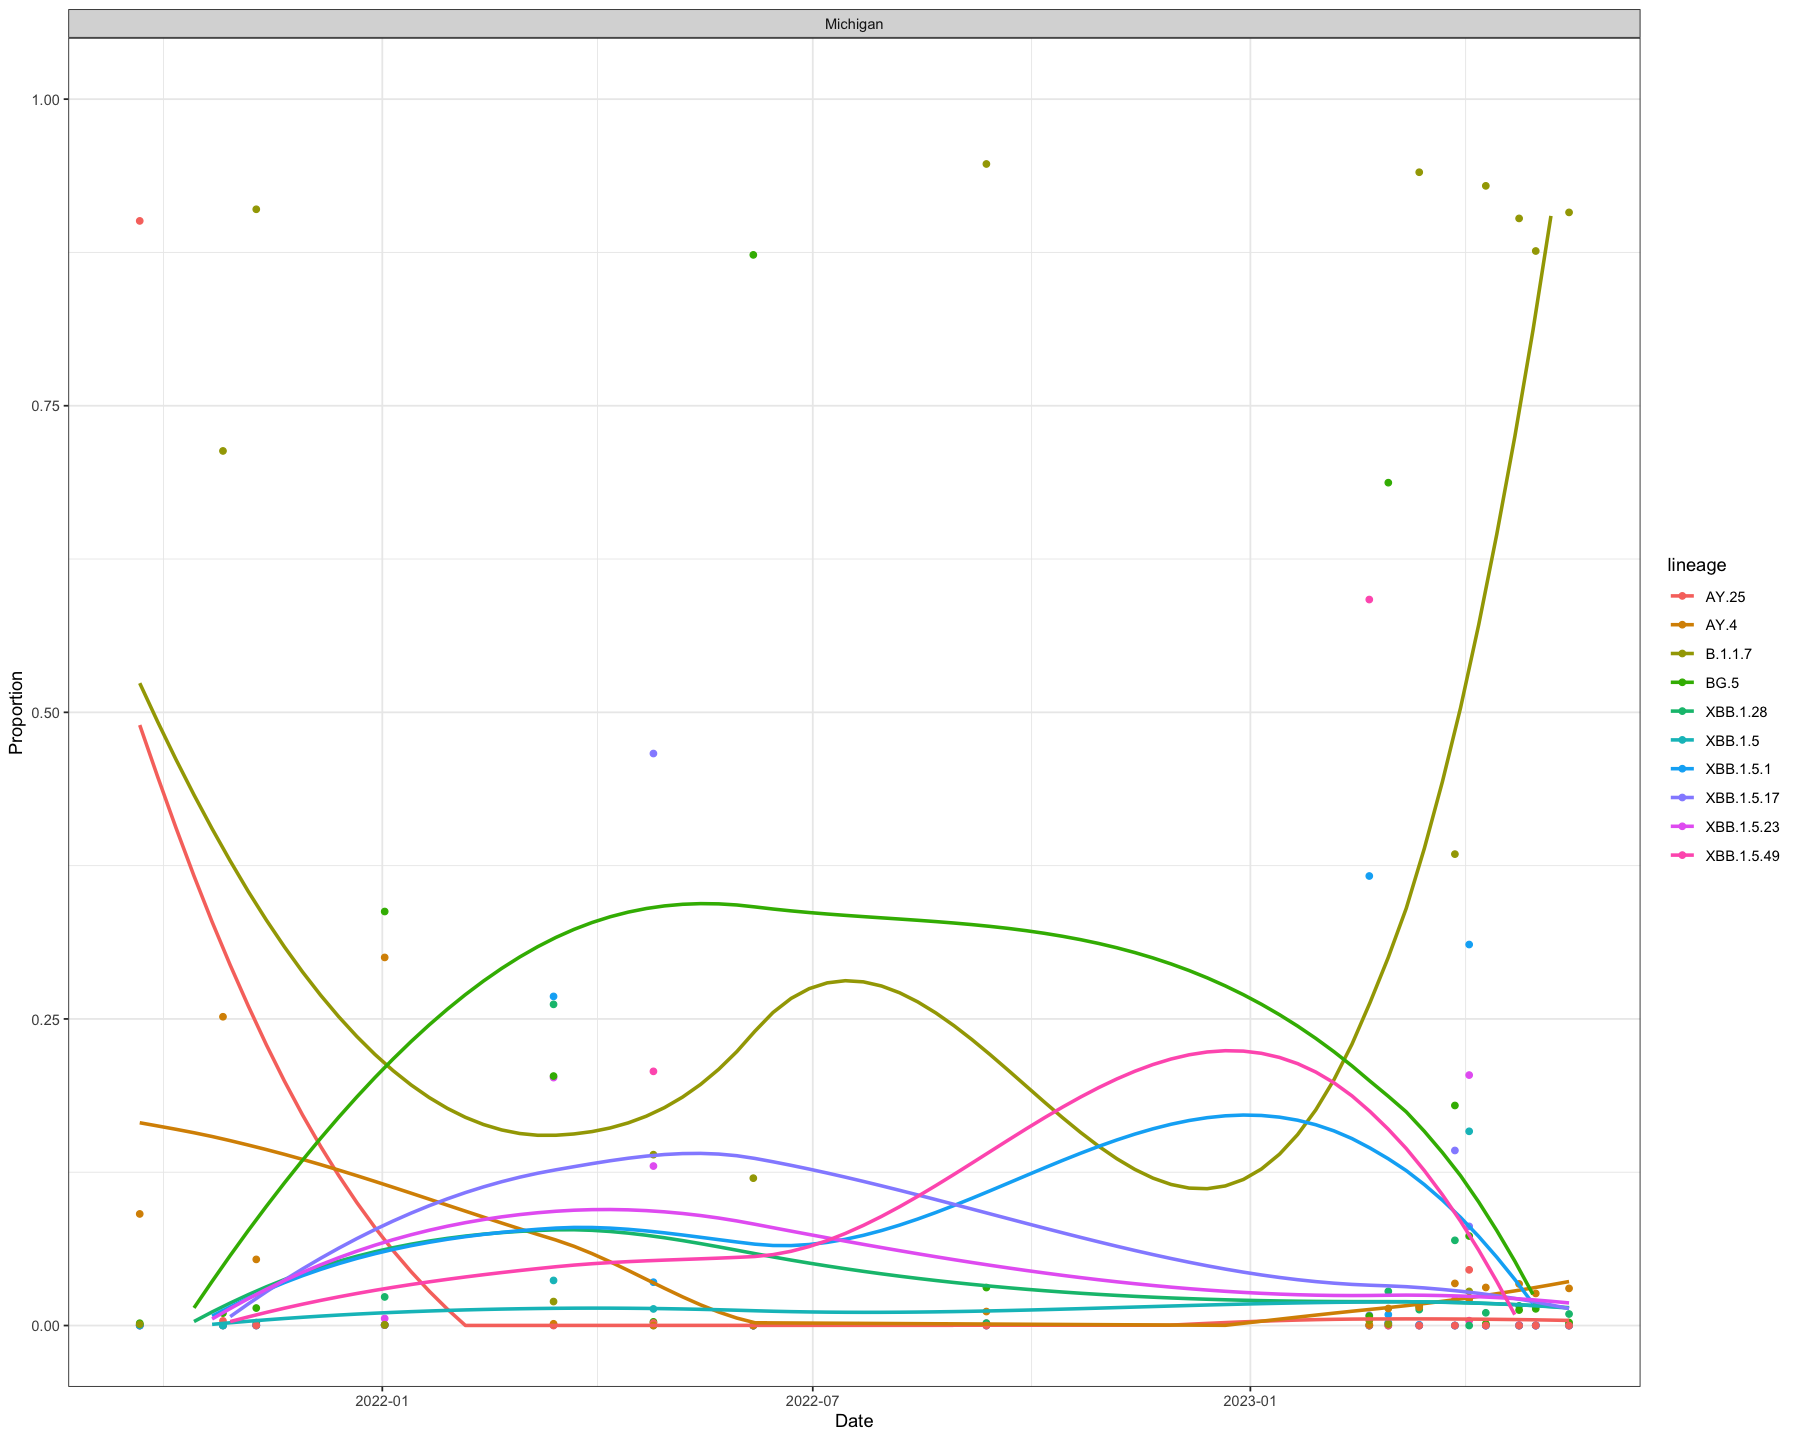

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
